### Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import math
import matplotlib.pyplot as plt
from terminaltables import AsciiTable

from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

cmap = plt.get_cmap('viridis')

### Load dataset

In [2]:
dataset = pd.read_pickle('data/dataset')

### Display correlation matrix

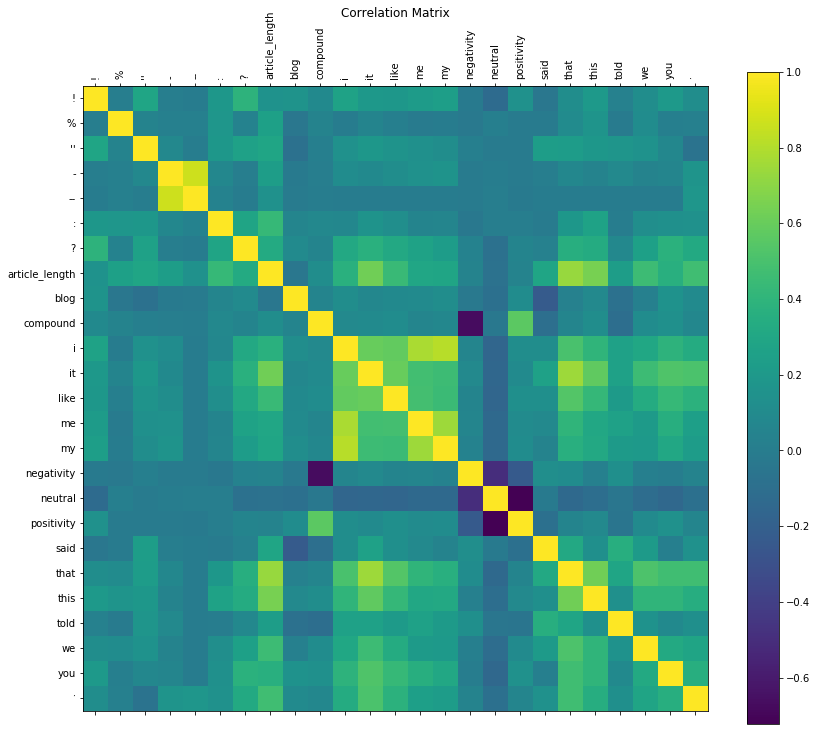

+------+----------------+------------------+
| Num. | Feature        | Blog Correlation |
+------+----------------+------------------+
| 0    | !              | 0.16413          |
| 1    | %              | -0.04112         |
| 2    | ''             | -0.08196         |
| 3    | -              | -0.01235         |
| 4    | --             | -0.00966         |
| 5    | :              | 0.06216          |
| 6    | ?              | 0.09873          |
| 7    | article_length | -0.03917         |
| 8    | blog           | 1.0              |
| 9    | compound       | 0.0528           |
| 10   | i              | 0.122            |
| 11   | it             | 0.07716          |
| 12   | like           | 0.0972           |
| 13   | me             | 0.10276          |
| 14   | my             | 0.12266          |
| 15   | negativity     | -0.02596         |
| 16   | neutral        | -0.08574         |
| 17   | positivity     | 0.11679          |
| 18   | said           | -0.22787         |
| 19   | t

In [31]:
blog_i = list(dataset.columns).index("blog")

# Normalize the data
dataset_norm = (dataset - dataset.mean()) / (dataset.max() - dataset.min())

correlation_matrix = dataset_norm.corr().values.round(5)

# Plot the correlation matrix
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_norm.corr(), cmap=cmap, interpolation='nearest')

# Add title to matrix plot
ax.set_title("Correlation Matrix")
ttl = ax.title
ttl.set_position([.5, 1.1])

# Add feature names to axises
plt.xticks(range(dataset_norm.shape[1]), dataset_norm.columns, rotation=45)
plt.yticks(range(dataset_norm.shape[1]), dataset_norm.columns)

# Add color bar to the right of the matrix
fig.colorbar(cax)
plt.show()
plt.close()

# Extract the blog feature correlations
target_corr = correlation_matrix[:, blog_i]

# Show feature table with correlations to blog articles
table_data = [["Num.", "Feature", "Blog Correlation"]]
for i, col in enumerate(dataset.columns):
    table_data.append([i, col, target_corr[i]])
print (AsciiTable(table_data).table)
print ("")


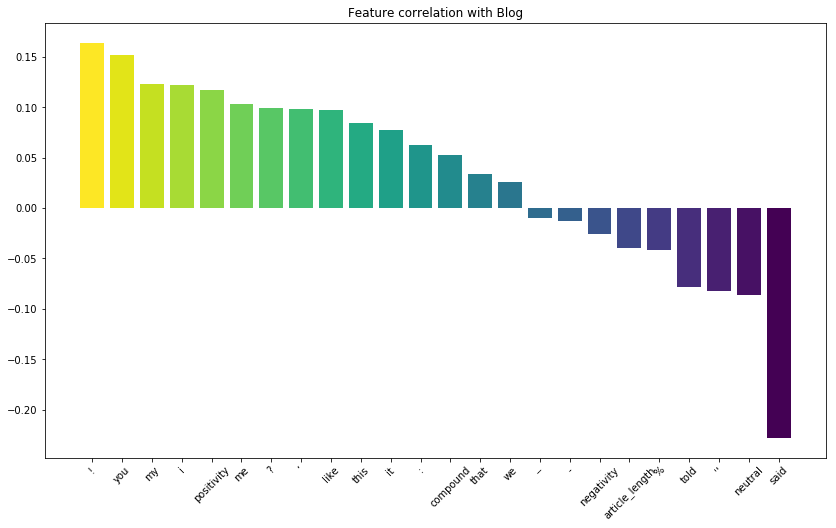

In [8]:
# Find the features with highest blog correlation
target_highest = np.argsort(target_corr)[::-1]

colors = [cmap(i) for i in np.linspace(0, 1, len(target_highest)-1)][::-1]

x_labels = [dataset.columns[i] for i in target_highest]

plt.figure(figsize=(12, 8))
plt.title("Feature correlation with Blog")
plt.bar(range(len(target_highest)-1), target_corr[target_highest][1:], color=colors)
plt.xticks(range(len(dataset.columns)-1), x_labels[1:], rotation=45)
plt.show()
plt.close()

### Compare features between distributions

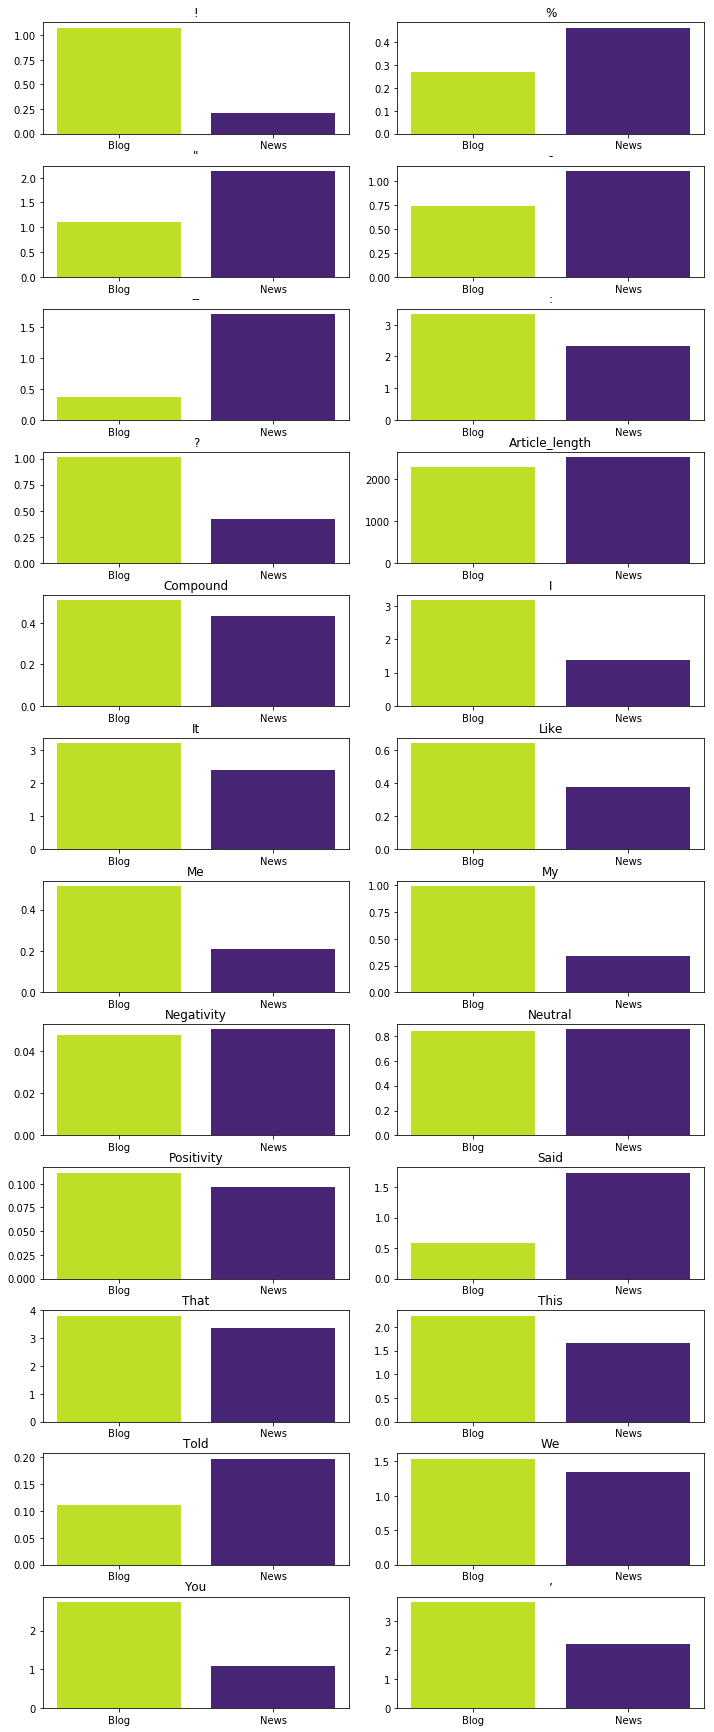

In [27]:

feature_names = [col for col in dataset.columns if col != "blog"]

news_articles = dataset[dataset['blog'] == 0][feature_names].mean()
blog_articles = dataset[dataset['blog'] == 1][feature_names].mean()

mean_values = []
for feature_name in feature_names:
    mean_values.append((news_articles[feature_name], blog_articles[feature_name]))
 
colors = [cmap(0.1), cmap(0.9)]

# Plot grid

n_cols = 2
n_rows = math.ceil(len(feature_names)/n_cols)

fw, fh = 10, n_rows*2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fw, fh))
fig.tight_layout()
for i in range(len(feature_names)):
    subplot = plt.subplot(n_rows, n_cols, i+1)
    subplot.set_title(feature_names[i].capitalize())
    subplot.bar(("News", "Blog"), mean_values[i], color=colors)  
plt.show()
plt.close()
